In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(os.path.join("data", "processed", "regional_portraits.csv"), index_col="commune_id")

In [3]:
df.shape

(2202, 44)

### Reading the language regions

In [4]:
df_lang = pd.read_excel(os.path.join("data", "source", "20584_131.xlsx"), header=4, skipfooter=11)
new_cols = ['commune_id', 'name', "language" ]
df_lang.columns = new_cols
df_lang["commune_id"] = df_lang["commune_id"].astype(int)
df_lang.set_index("commune_id", inplace=True)
df_lang.replace({ "Deutsches Sprachgebiet": "de", "Französisches Sprachgebiet": "fr", 
           "Italienisches Sprachgebiet": "it", "Rätoromanisches Sprachgebiet": "rm"}, inplace=True)

In [5]:
df_lang.head(3)

,name,language
commune_id,,
1,Aeugst am Albis,de
2,Affoltern am Albis,de
3,Bonstetten,de


In [6]:
df_lang.tail(3)

,name,language
commune_id,,
6808,Clos du Doubs,fr
6809,Haute-Ajoie,fr
6810,La Baroche,fr


### Join data and handle missing values

In [7]:
df = df.join(df_lang, how="left", rsuffix="_")

In [8]:
idx = (df["name"] != df["name_"])
df.loc[idx, ["name", "name_", "language"]]

,name,name_,language
commune_id,,,
292.0,Stammheim,NaN,NaN
293.0,Wädenswil,NaN,NaN
294.0,Elgg,NaN,NaN
295.0,Horgen,NaN,NaN
889.0,Thurnen,NaN,NaN
2117.0,Villaz,NaN,NaN
2237.0,Prez,NaN,NaN
3544.0,Bergün Filisur,NaN,NaN
3714.0,Rheinwald,NaN,NaN


In [9]:
# manual lookup of missing communes (new communes through mergers)
df.loc[[292, 293, 294, 295, 889, 3544, 3714], "language"] = "de"
df.loc[[2117, 2237, 6417], "language"] = "fr"
df.loc[5287, "language"] = "it"
df.drop(columns="name_", inplace=True)

Stammheim 292 (ex Oberstammheim, Unterstammheim, Waltalingen, 01.01.2019) de  
Wädenswil 293 (ex Wädenswil 142, Hütten 134, Schönenberg (ZH), 01.01.2019) de  
Elgg 294 (ex Elgg 217, Hofstetten (ZH) 222, 01.01.2018) de  
Horgen 295 (ex Horgen 133, Hirzel 132, 01.01.2018) de  
Thurnen 889 (ex Kirchenthurnen 873, Mühlethurnen 876, Lohnstorf 874, 01.01.2020 ) de  
Villaz 2117 (ex Villaz-Saint-Pierre 2111, La Folliaz 2116, 01.01.2020) fr  
Prez 2237 (ex Prez-vers-Noréaz 2221, Corserey 2185, Noréaz 2213, 01.01.2020) fr  
Bergün Filisur 3544 (ex Bergün 3521, Filisur 3522, 01.01.2018) de  
Rheinwald 3714 (ex Splügen 3694, Hinterrhein 3691, Nufenen 3693, 01.01.2019) de  
Riviera 5287 (ex Cresciano 5283, Iragna 5284, Lodrino 5285, Osogna 5286, 02.04.2017) it  
La Grande Béroche 6417 (ex Bevaix 6402, Fresens 6409, Gorgier 6410, Montalchez 6411, Saint-Aubin-Sauges 6414, Vaumarcus 6415, 01.01.2018) fr  

### Preliminary EDA languages

In [10]:
df.language.value_counts()

de    1414
fr     638
it     130
rm      20
Name: language, dtype: int64

In [11]:
df.groupby(by="language")["po_value"].mean()
# it looks like the language region does indeed influence the po-value ("röstigraben")

language
de    0.642270
fr    0.136041
it    0.441801
rm    0.458889
Name: po_value, dtype: float64

In [12]:
df = pd.get_dummies(df, columns=["language"])
df.to_csv(os.path.join("data", "processed", "regional_portraits2.csv"))

### Health insurance premiums

In [13]:
df_premiums = pd.read_excel(os.path.join("data", "source", "praemienregionen-version-maerz-2020.xlsx"), sheet_name="D_PRIM", header=15)
new_cols = ['commune_id', 'canton', "name", "health_region", "health_premium_child", "health_premium_young",
            "health_premium_adult" ]
df_premiums.columns = new_cols
df_premiums.set_index("commune_id", inplace=True)

In [14]:
df_premiums.head(3)

,canton,name,health_region,health_premium_child,health_premium_young,health_premium_adult
commune_id,,,,,,
1,ZH,Aeugst am Albis,3,90.31,242.1,335.73
2,ZH,Affoltern am Albis,3,90.31,242.1,335.73
3,ZH,Bonstetten,3,90.31,242.1,335.73


In [15]:
df_premiums.tail(3)

,canton,name,health_region,health_premium_child,health_premium_young,health_premium_adult
commune_id,,,,,,
6808,JU,Clos du Doubs,0,101.16,267.96,406.54
6809,JU,Haute-Ajoie,0,101.16,267.96,406.54
6810,JU,La Baroche,0,101.16,267.96,406.54


In [16]:
df = df.join(df_premiums, how="left", rsuffix="_")

In [17]:
idx = (df["name"] != df["name_"])
df.loc[idx, ["name", "name_", "canton", "health_region", "health_premium_adult"]]

,name,name_,canton,health_region,health_premium_adult
commune_id,,,,,
889.0,Thurnen,NaN,NaN,NaN,NaN
2117.0,Villaz,NaN,NaN,NaN,NaN
2237.0,Prez,NaN,NaN,NaN,NaN
6417.0,La Grande Béroche,La Grande-Béroche,NE,0.0,426.53


As above  
Thurnen 889 (ex Kirchenthurnen 873, Mühlethurnen 876, Lohnstorf 874, 01.01.2020)  
Villaz 2117 (ex Villaz-Saint-Pierre 2111, La Folliaz 2116, 01.01.2020)  
Prez 2237 (ex Prez-vers-Noréaz 2221, Corserey 2185, Noréaz 2213, 01.01.2020)  

In [18]:
# all ex communes have same values
# df_premiums.loc[[873, 874, 876]]
# df_premiums.loc[[2111, 2116]]
# df_premiums.loc[[2185, 2213, 2221]]
cols = ["canton", "health_region", "health_premium_child", "health_premium_young", "health_premium_adult"]
df.loc[889, cols] = df_premiums.loc[873, cols]
df.loc[2117, cols] = df_premiums.loc[2111, cols]
df.loc[2237, cols] = df_premiums.loc[2185, cols]

In [19]:
df.groupby(by="health_region").mean()["health_premium_adult"]

health_region
0.0    360.611174
1.0    406.027564
2.0    367.705518
3.0    328.875167
Name: health_premium_adult, dtype: float64

In [20]:
# health region zero: cantons that have no regions at all
# their premiums are closest to region 2 premiums and we set them as 2
idx = (df["health_region"] == 0)
df.loc[idx, "health_region"] = 2
df.drop(columns="name_", inplace=True)

### Preliminary EDA health insurance premiums

In [21]:
df[["health_premium_child","health_premium_young", "health_premium_adult"]].describe()

,health_premium_child,health_premium_young,health_premium_adult
count,2202.000000,2202.000000,2202.000000
mean,95.681471,258.043924,365.441880
std,11.595043,33.090565,40.484716
min,68.510000,171.790000,266.400000
25%,87.500000,237.010000,335.910000
50%,94.820000,254.880000,363.220000
75%,101.160000,271.620000,402.490000
max,129.150000,372.630000,483.150000


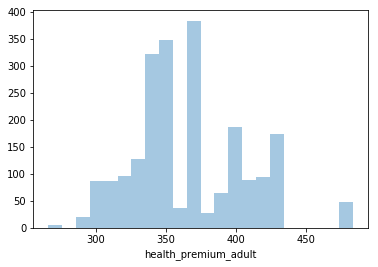

In [22]:
sns.distplot(df["health_premium_adult"], kde=False);

In [23]:
df[["health_premium_child","health_premium_young", "health_premium_adult", "po_value"]].corr()

,health_premium_child,health_premium_young,health_premium_adult,po_value
health_premium_child,1.000000,0.957438,0.963999,-0.532757
health_premium_young,0.957438,1.000000,0.948508,-0.558060
health_premium_adult,0.963999,0.948508,1.000000,-0.518940
po_value,-0.532757,-0.558060,-0.518940,1.000000


That is the best correlation found so far ~ -0.5. Political orientation and health premiums (i.e. health costs) are correlated.

In [24]:
# geography (cantons) matter a lot for po-values (similar to language)
df.groupby(by="canton").mean()["po_value"].sort_values()

canton
NE   -0.126306
GE   -0.077506
JU   -0.048115
BS    0.145005
VD    0.154801
BL    0.236412
VS    0.281907
FR    0.283175
ZG    0.293656
GL    0.308422
TI    0.408221
SO    0.445810
LU    0.502059
AI    0.545316
SG    0.614731
ZH    0.625123
AG    0.632785
GR    0.640945
UR    0.682868
TG    0.702993
BE    0.776854
SH    0.847708
SZ    0.920607
OW    0.967382
NW    1.320663
AR    1.514270
Name: po_value, dtype: float64

In [25]:
df.to_csv(os.path.join("data", "processed", "regional_portraits3.csv"))

### Taxable income

In [26]:
df_inc = pd.read_excel(os.path.join("data", "source","23875_131.xlsx"), header=5, skipfooter=11)
new_cols = ['commune_id', 'name', 'total_tax_income', 'per_capita_tax_income']
df_inc.columns = new_cols
df_inc.set_index("commune_id", inplace=True)

In [27]:
df_inc.head(3)

,name,total_tax_income,per_capita_tax_income
commune_id,,,
1,Aeugst am Albis,101.3324,51255.639858
2,Affoltern am Albis,381.2711,32039.588235
3,Bonstetten,214.2104,39413.137075


In [28]:
df_inc.tail(3)

,name,total_tax_income,per_capita_tax_income
commune_id,,,
6808,Clos du Doubs,28.8851,21866.086298
6809,Haute-Ajoie,22.9044,24340.488842
6810,La Baroche,25.8921,21363.118812


In [29]:
df = df.join(df_inc, how="left", rsuffix="_")

In [30]:
idx = (df["name"] != df["name_"])
df.loc[idx, ["name", "name_", "total_tax_income", "per_capita_tax_income"]]

,name,name_,total_tax_income,per_capita_tax_income
commune_id,,,,
292.0,Stammheim,NaN,NaN,NaN
293.0,Wädenswil,NaN,NaN,NaN
294.0,Elgg,NaN,NaN,NaN
295.0,Horgen,NaN,NaN,NaN
889.0,Thurnen,NaN,NaN,NaN
2054.0,Estavayer,NaN,NaN,NaN
2055.0,Cheyres-Châbles,NaN,NaN,NaN
2117.0,Villaz,NaN,NaN,NaN
2237.0,Prez,NaN,NaN,NaN


Stammheim 292 (ex Oberstammheim, Unterstammheim, Waltalingen, 01.01.2019) de  
Wädenswil 293 (ex Wädenswil 142, Hütten 134, Schönenberg (ZH) 140, 01.01.2019) de  
Elgg 294 (ex Elgg 217, Hofstetten (ZH) 222, 01.01.2018) de  
Horgen 295 (ex Horgen 133, Hirzel 132, 01.01.2018) de  
Thurnen 889 (ex Kirchenthurnen 873, Mühlethurnen 876, Lohnstorf 874, 01.01.2020 ) de  
Estavayer 2054 (ex  Bussy 2004, Estavayer-le-Lac 2015, Morens 2033, Murist 2034, Rueyres-les-Prés 2039, Vernay 2052, Vuissens 2049) 01.01.2017  
Cheyres-Châbles 2055 (ex Châbles 2005, Cheyres 2010)  
Villaz 2117 (ex Villaz-Saint-Pierre 2111, La Folliaz 2116, 01.01.2020) fr  
Prez 2237 (ex Prez-vers-Noréaz 2221, Corserey 2185, Noréaz 2213, 01.01.2020) fr  
Bergün Filisur 3544 (ex Bergün 3521, Filisur 3522, 01.01.2018) de  
Rheinwald 3714 (ex Splügen 3694, Hinterrhein 3691, Nufenen 3693, 01.01.2019) de  
Riviera 5287 (ex Cresciano 5283, Iragna 5284, Lodrino 5285, Osogna 5286, 02.04.2017) it  
Jorat-Mézières 5806 (ex Carrouge 5782, Ferlens 5789, Mézières 5791) 01.01.2016  
Goms 6077 (ex Blitzingen 6055, Niederwald 6064, Grafschaft 6073, Münster-Geschinen 6074, Reckingen-Gluringen 6075) 01.01.2017  
Crans-Montana 6253 (ex Chermignon 6234, Mollens (VS) 6242, Montana 6243, Randogne 6244) 01.01.2017  
La Grande Béroche 6417 (ex Bevaix 6402, Fresens 6409, Gorgier 6410, Montalchez 6411, Saint-Aubin-Sauges 6414, Vaumarcus 6415, 01.01.2018) fr  

In [31]:
df_inc["capita"] = 1e6 * df_inc["total_tax_income"] / df_inc["per_capita_tax_income"]

def calc_tax(df, df_inc, comm_id, old_comm_ids):
    df.loc[comm_id, "total_tax_income"] = df_inc.loc[old_comm_ids, "total_tax_income"].sum()
    df.loc[comm_id, "per_capita_tax_income"] = \
        1e6 * df_inc.loc[old_comm_ids, "total_tax_income"].sum() / df_inc.loc[old_comm_ids, "capita"].sum()

calc_tax(df, df_inc, 292, [36, 42, 44])
calc_tax(df, df_inc, 293, [134, 140, 142])
calc_tax(df, df_inc, 294, [217, 222])
calc_tax(df, df_inc, 295, [132, 133])
calc_tax(df, df_inc, 889, [873, 874, 876])
calc_tax(df, df_inc, 2054, [2004, 2015, 2033, 2034, 2039, 2049, 2052])
calc_tax(df, df_inc, 2055, [2005, 2010])
calc_tax(df, df_inc, 2117, [2111, 2116])
calc_tax(df, df_inc, 2237, [2185, 2213, 2221])
calc_tax(df, df_inc, 3544, [3521, 3522])
calc_tax(df, df_inc, 3714, [3691, 3693, 3694])
calc_tax(df, df_inc, 5287, [5283, 5284, 5285, 5286])
calc_tax(df, df_inc, 5806, [5782, 5789, 5791])
calc_tax(df, df_inc, 6077, [6055, 6064, 6073, 6074, 6075])
calc_tax(df, df_inc, 6253, [6234, 6242, 6243, 6244])
calc_tax(df, df_inc, 6417, [6402, 6409, 6410, 6411, 6414, 6415])
df.drop(columns="name_", inplace=True)

In [32]:
df[["total_tax_income", "per_capita_tax_income"]].describe()

,total_tax_income,per_capita_tax_income
count,2202.000000,2202.000000
mean,129.270913,32367.225014
std,465.156304,14083.570349
min,0.390700,10148.863636
25%,20.517875,25932.248397
50%,47.267250,29743.091310
75%,116.128050,34874.488581
max,16243.491000,402641.206030


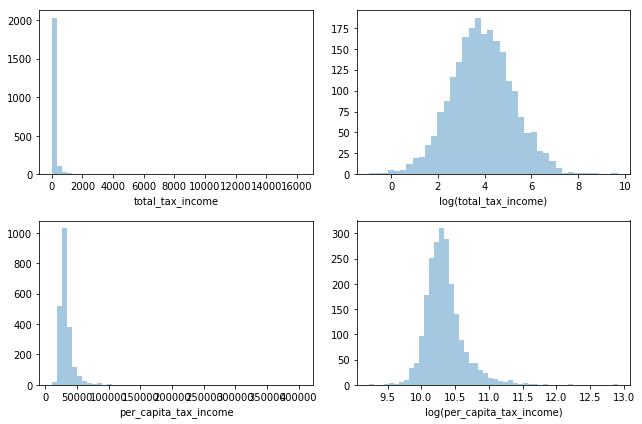

In [33]:
fig, axs = plt.subplots(2, 2, figsize = (9, 6))
sns.distplot(df["total_tax_income"], kde = False, ax = axs[0, 0])
sns.distplot(np.log(df["total_tax_income"]), kde = False, ax = axs[0, 1])
axs[0, 1].set_xlabel("log(total_tax_income)")
sns.distplot(df["per_capita_tax_income"], kde = False, ax = axs[1, 0])
sns.distplot(np.log(df["per_capita_tax_income"]), kde = False, ax = axs[1, 1])
axs[1, 1].set_xlabel("log(per_capita_tax_income)")
plt.tight_layout()
plt.show()

Total tax income and per capita tax income are very skewed. Log-transform will be helpful. Have to look at outliers.

In [34]:
df["log_total_tax_income"] = np.log(df["total_tax_income"])
df["log_per_capita_tax_income"] = np.log(df["per_capita_tax_income"])
df[["total_tax_income", "log_total_tax_income", "per_capita_tax_income", "log_per_capita_tax_income", "po_value"]].corr()

,total_tax_income,log_total_tax_income,per_capita_tax_income,log_per_capita_tax_income,po_value
total_tax_income,1.000000,0.443659,0.110432,0.139403,-0.164110
log_total_tax_income,0.443659,1.000000,0.263579,0.355314,-0.191861
per_capita_tax_income,0.110432,0.263579,1.000000,0.877050,-0.125226
log_per_capita_tax_income,0.139403,0.355314,0.877050,1.000000,-0.190193
po_value,-0.164110,-0.191861,-0.125226,-0.190193,1.000000


Only weak (negative) correlation between taxable income and po-value.

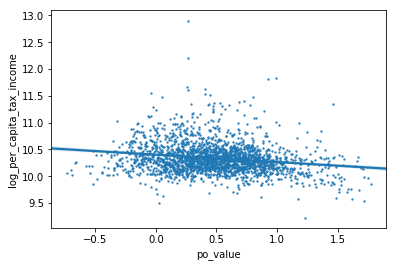

In [35]:
sns.regplot(data=df, x="po_value", y="log_per_capita_tax_income", scatter_kws={'s':2});

In [36]:
df.drop(columns=["log_total_tax_income", "log_per_capita_tax_income"], inplace=True)
df.to_csv(os.path.join("data", "processed", "regional_portraits4.csv"))